In [1]:
%reset
import xesmf as xe
import gcm_filters
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.ticker as ticker
from dask.diagnostics import ProgressBar
import cartopy.crs as ccrs
import cmocean
from xgcm import Grid
print('done')

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


done


### Execute the following cell to read in NW2 data for 1/4 degree

In [2]:
%cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.25deg_N15_baseline_hmix5/
fs = xr.open_dataset('static.nc', decode_times=False)
os = xr.open_mfdataset(['sub01/ocean.stats.nc','sub02/ocean.stats.nc'], decode_times=False)
av = xr.open_dataset('averages_00031502.nc', decode_times=False)  #100 5-day averages

%cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/

/glade/campaign/univ/unyu0004/NeverWorld2/nw2_0.25deg_N15_baseline_hmix5
/glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis


In [6]:
%%time
xh_025 = fs.xh.values
yh_025 = fs.yh.values

grid= Grid(av, coords={'X': {'center': 'xh', 'outer': 'xq'}, #This tells the grid where xh, xq, yh, and yq are defined.
                        'Y': {'center': 'yh', 'outer': 'yq'}});
h  = av['h'].mean('time').fillna(0.)
depth=h.sum('zl')


u  = av['u'];  u = grid.interp(u,axis='X')
v  = av['v'];  v = grid.interp(v,axis='Y')


u_BT = (u*h/depth).sum('zl'); v_BT = (v*h/depth).sum('zl')
u_BC = u-u_BT; v_BC = v-v_BT;

# #Total kinetic energy:
KE_BT_tot = 0.5*(u_BT**2+v_BT**2).mean('time')
KE_BC_tot = ((0.5*(u_BC**2+v_BC**2)*h/depth).sum('zl')).mean('time')
KE_tot=KE_BT_tot+KE_BC_tot


fraction_BT_025=KE_BT_tot/KE_tot

CPU times: user 10.3 s, sys: 10.2 s, total: 20.4 s
Wall time: 29.6 s


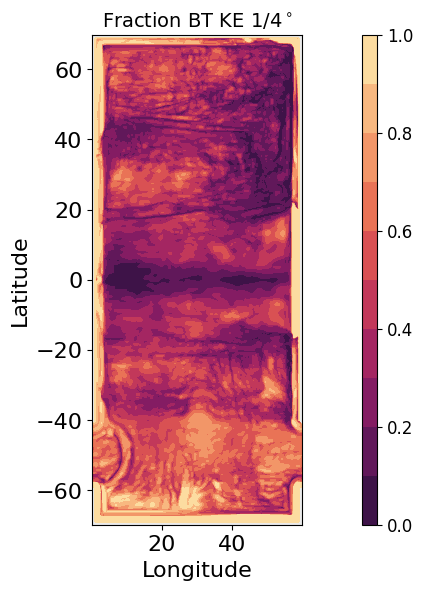

In [10]:
#Plotting KE for whole domain (FILTERED KE)
fig = plt.figure(figsize=(5, 7), dpi=100, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.2,0.6,0.7]) 
ax2 = fig.add_axes([.78, 0.2, 0.03, 0.7])
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_xlabel('Longitude',fontsize=16)
ax1.set_ylabel('Latitude',fontsize=16)
ax1.tick_params(labelsize=16); 
ax2.tick_params(labelsize=14)

levels=np.linspace(0,1.,11)


ax1.set_title('Fraction BT KE $1/4^\circ$',fontsize=14)

plotted =ax1.contourf(xh_025,yh_025,fraction_BT_025,levels=levels,cmap=cmocean.cm.matter_r)
ax1.set_aspect('equal', 'box')
cbar = plt.colorbar(mappable=plotted, cax=ax2, orientation = 'vertical');
cbar.ax.tick_params(labelsize=12);
#ax2.set_title('$log_{10}(KE)$')
#
plt.show()

### NW2 data for 1/32 degree

In [11]:
#1/32 degree resolution, surface diagnostics are for uppermost 5 meters.
%cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.03125deg_N15_baseline_hmix5
fs = xr.open_dataset('static.nc', decode_times=False)
os = xr.open_mfdataset(['sub01/ocean.stats.nc','sub02/ocean.stats.nc','sub03/ocean.stats.nc','sub04/ocean.stats.nc',
                        'sub05/ocean.stats.nc','sub06/ocean.stats.nc','sub07/ocean.stats.nc','sub08/ocean.stats.nc'], decode_times=False)
av = xr.open_dataset('averages_00002702.nc', decode_times=False)  #20 5-day averages
#av = xr.open_mfdataset(['averages_00002302.nc','averages_00002402.nc','averages_00002502.nc','averages_00002602.nc','averages_00002702.nc'], decode_times=False)  #20 5-day averages

%cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/

/glade/campaign/univ/unyu0004/NeverWorld2/nw2_0.03125deg_N15_baseline_hmix5
/glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis


In [12]:
%%time
xh_003125 = fs.xh.values
yh_003125 = fs.yh.values

grid= Grid(av, coords={'X': {'center': 'xh', 'outer': 'xq'}, #This tells the grid where xh, xq, yh, and yq are defined.
                        'Y': {'center': 'yh', 'outer': 'yq'}});
h  = av['h'].mean('time').fillna(0.)
depth=h.sum('zl')


u  = av['u'];  u = grid.interp(u,axis='X')
v  = av['v'];  v = grid.interp(v,axis='Y')


u_BT = (u*h/depth).sum('zl'); v_BT = (v*h/depth).sum('zl')
u_BC = u-u_BT; v_BC = v-v_BT;

# #Total kinetic energy:
KE_BT_tot = 0.5*(u_BT**2+v_BT**2).mean('time')
KE_BC_tot = ((0.5*(u_BC**2+v_BC**2)*h/depth).sum('zl')).mean('time')
KE_tot=KE_BT_tot+KE_BC_tot


fraction_BT_003125=KE_BT_tot/KE_tot

CPU times: user 2min 38s, sys: 2min 9s, total: 4min 47s
Wall time: 4min 57s


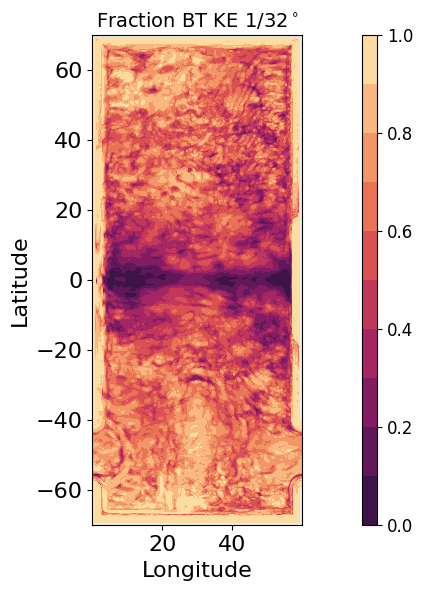

In [13]:
#Plotting KE for whole domain (FILTERED KE)
fig = plt.figure(figsize=(5, 7), dpi=100, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.2,0.6,0.7]) 
ax2 = fig.add_axes([.78, 0.2, 0.03, 0.7])
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_xlabel('Longitude',fontsize=16)
ax1.set_ylabel('Latitude',fontsize=16)
ax1.tick_params(labelsize=16); 
ax2.tick_params(labelsize=14)

levels=np.linspace(0,1.,11)

ax1.set_title('Fraction BT KE $1/32^\circ$',fontsize=14)

plotted =ax1.contourf(xh_003125,yh_003125,fraction_BT_003125,levels=levels,cmap=cmocean.cm.matter_r)
ax1.set_aspect('equal', 'box')
cbar = plt.colorbar(mappable=plotted, cax=ax2, orientation = 'vertical');
cbar.ax.tick_params(labelsize=12);
#ax2.set_title('$log_{10}(KE)$')

plt.show()

In [16]:
Bar003125= (fraction_BT_003125).coarsen(xh=8,yh=8, boundary="exact").mean()
Bar025=fraction_BT_025

/glade/work/eyankovsky/my_npl_clone/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  app.launch_new_instance()


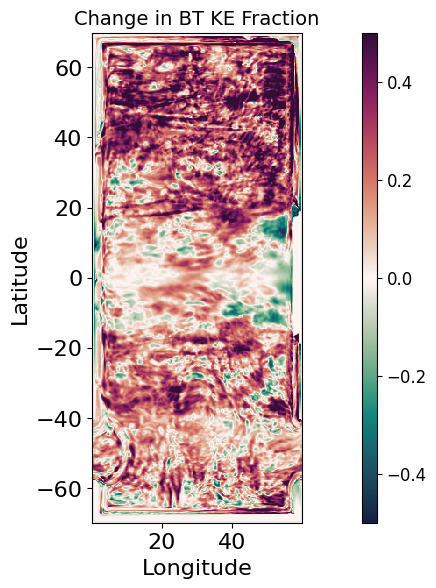

In [18]:
#Plotting KE for whole domain (FILTERED KE)
fig = plt.figure(figsize=(5, 7), dpi=100, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.2,0.6,0.7]) 
ax2 = fig.add_axes([.78, 0.2, 0.03, 0.7])
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_xlabel('Longitude',fontsize=16)
ax1.set_ylabel('Latitude',fontsize=16)
ax1.tick_params(labelsize=16); 
ax2.tick_params(labelsize=14)



var = Bar003125-Bar025
ax1.set_title('Change in BT KE Fraction',fontsize=14)

plotted =ax1.pcolor(xh_025,yh_025,var,cmap=cmocean.cm.curl,vmin=-.5,vmax=.5)
ax1.set_aspect('equal', 'box')
cbar = plt.colorbar(mappable=plotted, cax=ax2, orientation = 'vertical');
cbar.ax.tick_params(labelsize=12);
#ax2.set_title('$log_{10}(KE)$')
#
plt.show()